<a href="https://colab.research.google.com/github/a90h09/T5_Week2/blob/main/penguins_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA on Penguins

In this notebook exercise, we will conduct simple EDA steps on the popular penguins dataset.

### Load the dataset

Dataset source: https://github.com/allisonhorst/palmerpenguins

In [ ]:
import seaborn as sns

In [ ]:
df = sns.load_dataset('penguins')

In [ ]:
df.shape

(344, 7)

# Step 1 Understand the Features

You can find information about this dataset here: https://www.kaggle.com/code/parulpandey/penguin-dataset-the-new-iris

**Question: in your own words**:
1. describe each feature
2. mention its type (numeric or categorical)
3. write its name in Arabic

Note: use a Markdown cell.

Hint: you can attach an image to illustrate what the features are.

<img src="https://github.com/allisonhorst/palmerpenguins/raw/main/man/figures/culmen_depth.png" width="400">

# Step 2

- Have a look at the columns and their values (`head`, `sample`, `tail`)
- Look at the technical information (`info`)

In [ ]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


# Step 3

1. For each column, check and handle missing values; state your strategy and justify it. Examples:
    - Strategy: drop the column. Justification: ...?
    - Strategy: fill missing values. Justificaiton: ...?
    - Strategy: drop the row. Justification: ...?
1. Calculate count and percentage of missing values before handling them
1. Check and handle duplicated rows
1. Calculate the percentage of data loss after cleaning

In [ ]:
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [ ]:
df.dropna(inplace=True)
df.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

# Step 4

#### Data types conversion
- We shall convert the string types to `category` to preserve memory
- numeric types can be stored in less precision: `float32`

In [ ]:
mem_usage_before = df.memory_usage(deep=True)

In [ ]:
# convert categotical types
df['species'] = df['species'].astype('category')
df['island'] = df['island'].astype('category')
df['sex'] = df['sex'].astype('category')

In [ ]:
# convert numerical types
df['bill_depth_mm'] = df['bill_depth_mm'].astype('float32')
df['bill_length_mm'] = df['bill_length_mm'].astype('float32')
df['flipper_length_mm'] = df['flipper_length_mm'].astype('float32')
df['body_mass_g'] = df['body_mass_g'].astype('float32')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            333 non-null    category
 1   island             333 non-null    category
 2   bill_length_mm     333 non-null    float32 
 3   bill_depth_mm      333 non-null    float32 
 4   flipper_length_mm  333 non-null    float32 
 5   body_mass_g        333 non-null    float32 
 6   sex                333 non-null    category
dtypes: category(3), float32(4)
memory usage: 9.2 KB


Calculate memory saved after type conversion

In [ ]:
# mem_usage_after = ...?
mem_usage_after = df.memory_usage(deep=True)

In [ ]:
print('memory saved:', (mem_usage_before - mem_usage_after).sum() // 1024, 'KB')

memory saved: 64 KB


# Step 5

#### Detect inconsistency in categorical values

The categorical columns should be checked for any inconsistencies. For example. We look for lowercase, uppercase, or inconsistent use of codes (e.g., "M", "F") with non-codes (e.g., "Male", "Female")  in the `sex` column.

- hint: use `.unique()` to check the number of unique values in a column
- you can also use: `.value_counts()` to check the frequency of each value in a column

In [ ]:
print(df['sex'].unique())
print(df['island'].unique())
print(df['species'].unique())

['Male', 'Female']
Categories (2, object): ['Female', 'Male']
['Torgersen', 'Biscoe', 'Dream']
Categories (3, object): ['Biscoe', 'Dream', 'Torgersen']
['Adelie', 'Chinstrap', 'Gentoo']
Categories (3, object): ['Adelie', 'Chinstrap', 'Gentoo']


In [ ]:
print(df['island'].value_counts())
print(df['sex'].value_counts())
print(df['species'].value_counts())

island
Biscoe       163
Dream        123
Torgersen     47
Name: count, dtype: int64
sex
Male      168
Female    165
Name: count, dtype: int64
species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64


# Step 6: Univariate Analysis

- Separate numerical from categorical columns (hint; use `df.select_dtypes()`)
- Look at the statistical information for each:
    - `df_num.describe().T`
    - `df_cat.describe().T`

In [ ]:
df_num = df.select_dtypes(include='number')
df_cat = df.select_dtypes(include='category')

In [ ]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,333.0,43.992794,5.468668,32.099998,39.5,44.500000,48.599998,59.599998
bill_depth_mm,333.0,17.164865,1.969235,13.100000,15.6,17.299999,18.700001,21.500000
flipper_length_mm,333.0,200.966965,14.015765,172.000000,190.0,197.000000,213.000000,231.000000
body_mass_g,333.0,4207.057129,805.215820,2700.000000,3550.0,4050.000000,4775.000000,6300.000000


In [ ]:
df_cat.describe().T

,count,unique,top,freq
species,333,3,Adelie,146
island,333,3,Biscoe,163
sex,333,2,Male,168


Use charts to plot `value_counts()` categorical variables:
1. plot `species` using bar plot
1. plot `island` using pie chart
1. plot `sex` using horizontal bar plot

In [ ]:
import matplotlib.pyplot as plt

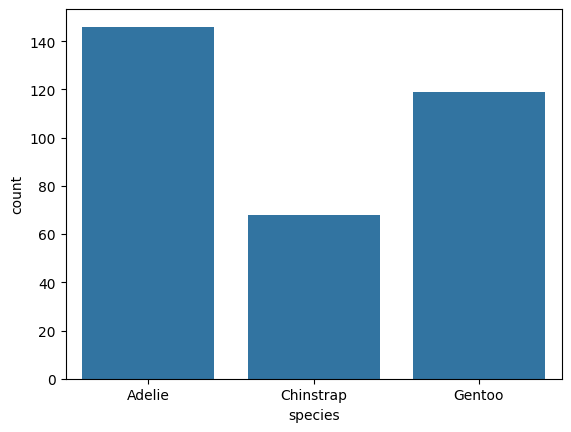

In [ ]:
sns.barplot(df['species'].value_counts())
plt.show()

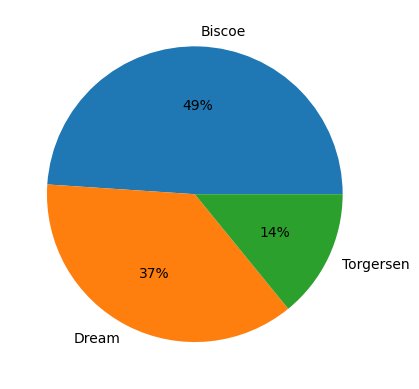

In [ ]:
plt.pie(df['island'].value_counts(), labels=df['island'].value_counts().index,autopct='%.0f%%')
plt.show()

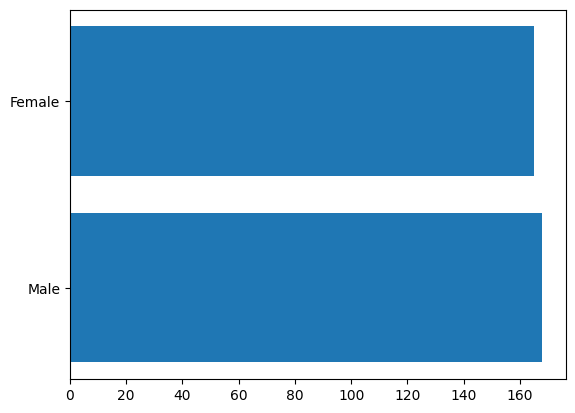

In [ ]:
plt.barh(df['sex'].value_counts().index, df['sex'].value_counts())
plt.show()

Plot numerical variables:

1. Boxplot: `bill_length_mm`
1. Histogram: `bill_depth_mm`
1. Boxplot: `flipper_length_mm`
1. Histogram: `body_mass_g`

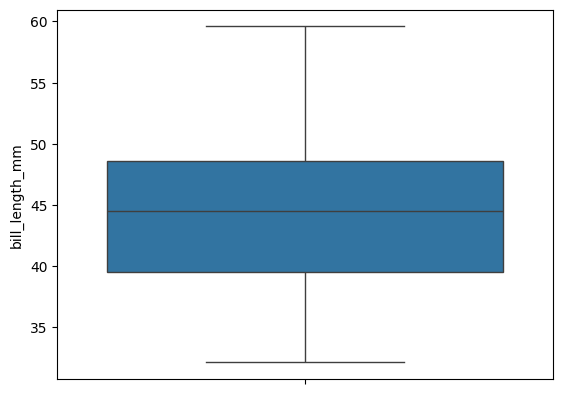

In [ ]:
sns.boxplot(df['bill_length_mm'])
plt.show()

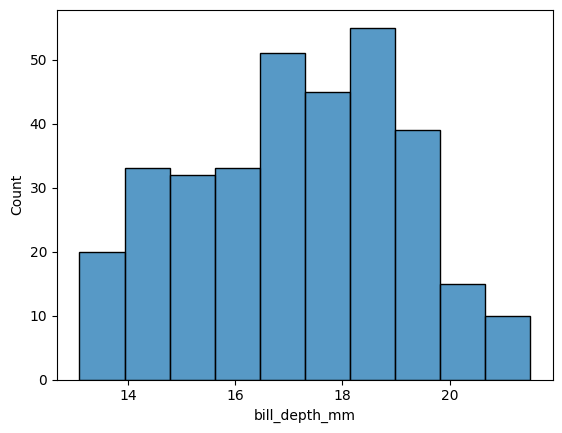

In [ ]:
sns.histplot(df['bill_depth_mm'])
plt.show()

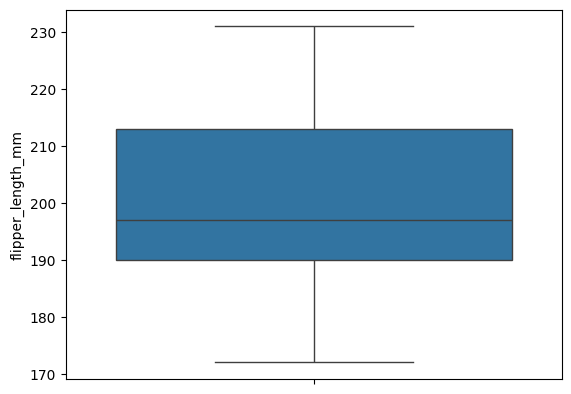

In [ ]:
sns.boxplot(df['flipper_length_mm'])
plt.show()

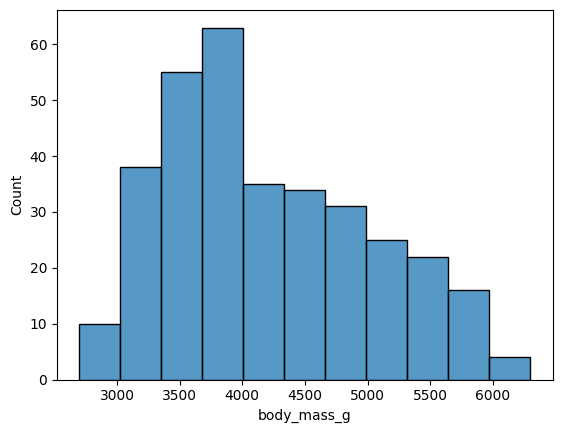

In [ ]:
sns.histplot(df['body_mass_g'])
plt.show()

## Step 7: Bivariate Analysis

#### Correlation between numerical features

Let's find out if there is any correlation between numerical features.

- Hint: you can use the `df.corr()` to find the correlation matrix.
- Hint: you can use `sns.heatmap()` to plot the correlation matrix

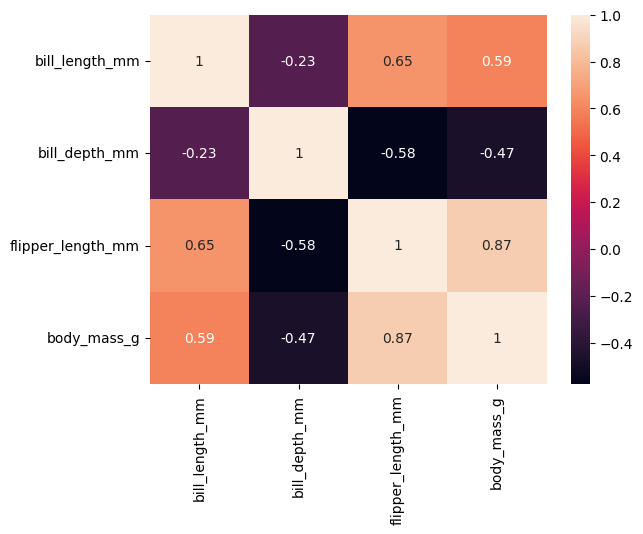

In [ ]:
matrix_corr = df_num.corr()
sns.heatmap(matrix_corr, annot=True)
plt.show()

Write down your observations based on the correlation heatmap.

Observations:

 - flipper_length_mm and body_mass_g are highly positively correlated.
 - bill_length_mm and body_mass_g are positively correlated.
 - bill_depth_mm and bill_length_mm are negatively correlated.

### Feature Engineering

- We might try adding the feature `bill_size` which is the product of `bill_length` and `bill_depth` to see if it has any significance in the model.
- We might also try `bill_ratio` which is the ratio of `bill_length` to `bill_depth` to see if it has any significance in the model.

In [ ]:
df['bill_size'] = df['bill_length_mm'] * df['bill_depth_mm']
df['bill_ratio'] = df['bill_length_mm'] / df['bill_depth_mm']
df_num = df.select_dtypes(include='number')

Let's look at the correlation to see whether the newly created features are better.

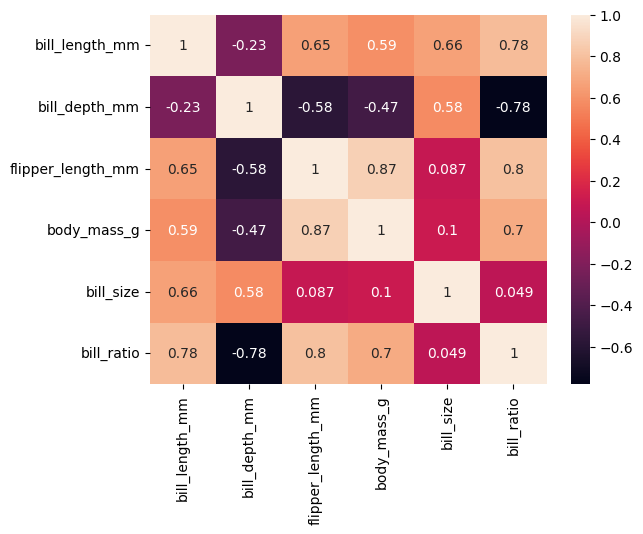

In [ ]:
matrix_corr = df_num.corr()
sns.heatmap(matrix_corr, annot=True)
plt.show()

<Axes: >

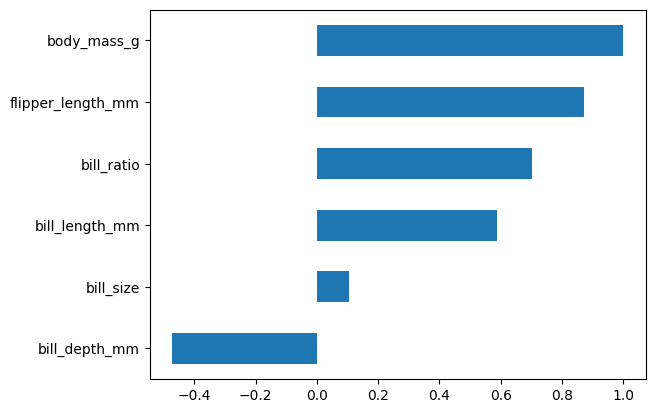

In [ ]:
# This plots the correlation values for a specific column
# which is usually what we are interested in

matrix_corr['body_mass_g'].sort_values().plot.barh()